In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix, silhouette_score, silhouette_samples
import matplotlib.cm as cm
import matplotlib.colors

 
import mlflow
import os

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Discrétisation
from sklearn.preprocessing import KBinsDiscretizer
# MCA
from fanalysis.mca import MCA
%matplotlib inline
# Kmeans
from sklearn.cluster import KMeans
#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,set_link_color_palette

from sklearn.cluster import AgglomerativeClustering


In [ ]:
# option d'affichage des résultats
pd.set_option("display.max_row",30)
pd.set_option("display.max_columns",100)

In [ ]:
# noms des variables de notre dataset y compris la variable identifiant IRIS
colonnes = ["IRIS","%C17_MENPSEUL","%C17_MENCOUPSENF","%C17_MENFAMMONO","%C17_PMEN_MENPSEUL","%P17_POP1524","%P17_POP2554","%P17_POP5579","%P17_POP80P","%P17_POP15P_PACSEE","%P17_POP15P_CONCUB_UNION_LIBRE","%P17_POP15P_VEUFS","%P17_POP15P_DIVORCEE","%P17_POP15P_CELIBATAIRE","%C17_MEN_CS1","%C17_MEN_CS2","%C17_MEN_CS3","%C17_MEN_CS4","%C17_MEN_CS5","%C17_MEN_CS6","%C17_MEN_CS7","%C17_MEN_CS8","%C17_NE24F0","%C17_NE24F4P","%P17_ACT1564","%P17_ACT1524","%P17_CHOM1564","%P17_CHOM1524","%P17_ETUD1564","%P17_AINACT1564","%P17_SAL15P","%P17_NSAL15P","%P17_SAL15P_CDI","%P17_SAL15P_EMPAID","%P17_NSAL15P_INDEP","%P17_ACTOCC15P_ILT1","%P17_ACTOCC15P_ILT2P","%C17_ACTOCC15P_VOIT","%C17_ACTOCC15P_TCOM","%P17_POP0205","%P17_SCOL0205","%P17_NSCOL15P_DIPLMIN","%P17_NSCOL15P_CAPBEP","%P17_NSCOL15P_BAC","%P17_NSCOL15P_SUP5","%P16_RP","%P16_RSECOCC","%P16_MAISON","%P16_APPART","%P16_RP_5P","%P16_RP_120P","%P16_RP_ACH19","%P16_RP_ACH45","%P16_RP_ACH70","%P16_RP_ACH90","%P16_RP_ACH05","%P16_RP_ACH13","%P16_PMEN_ANEM0002","%P16_PMEN_ANEM0204","%P16_PMEN_ANEM0509","%P16_PMEN_ANEM10P","%P16RP_PROP","%P16RP_LOC","%P16RP_LOCHLMV","%P16RP_CLIM","%P16RP_GARL","%P16RP_VOIT1","%P16RP_VOIT2P","%P16_POP_ETR","%P16_POP_IMM"]

In [ ]:
# importation du fichier (changer le chemin d'accès)
''' Faites attention au type de fichier, au délimiteur des valeurs (ça doit être unique et non multiple),
au header et à la lecture des types d'objets (low_memory) '''

data_orig = pd.read_csv("C:/Users/Christian/Desktop/Doc_Insee_classification/input_texte.txt",delim_whitespace="\t" , header = None, names=colonnes, low_memory=False, )#, dtype='Int64')

In [ ]:
''' copie superficielle (peu profonde) du dataset original pour ne pas modifier les valeurs
d'origine par erreur plus tard 
'''
data = data_orig.copy()
data.shape

(48043, 70)

In [ ]:
# visualisation des premiers lignes
data.head()

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8


In [ ]:
# Dans le cas où il faut compléter les informations manquantes
data2 = data
#for i in range(data2.shape[0]):
#  data2.iloc[i,0]= str(i+1).zfill(8)
data2  

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IRIS                            48043 non-null  object
 1   %C17_MENPSEUL                   48043 non-null  int64 
 2   %C17_MENCOUPSENF                48043 non-null  int64 
 3   %C17_MENFAMMONO                 48043 non-null  int64 
 4   %C17_PMEN_MENPSEUL              48043 non-null  int64 
 5   %P17_POP1524                    48043 non-null  int64 
 6   %P17_POP2554                    48043 non-null  int64 
 7   %P17_POP5579                    48043 non-null  int64 
 8   %P17_POP80P                     48043 non-null  int64 
 9   %P17_POP15P_PACSEE              48043 non-null  int64 
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  int64 
 11  %P17_POP15P_VEUFS               48043 non-null  int64 
 12  %P17_POP15P_DIVORCEE            48043 non-null

In [ ]:
data2.describe()

,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
count,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000,48043.000000
mean,31.339633,29.048810,8.140249,31.339633,12.062278,45.318277,33.728722,6.921154,4.205254,11.652436,6.679225,5.328976,23.639427,2.762421,4.764274,8.477635,14.364361,14.911517,16.222821,31.009034,4.216743,50.988427,1.725121,74.460234,42.332827,8.764586,11.121641,8.454530,7.620632,41.346710,7.727390,34.993839,0.143330,4.454593,29.619632,71.426347,76.922882,8.460275,4.222904,74.185355,22.597111,26.839207,16.857565,7.297962,80.937452,9.724122,74.351831,23.877027,45.224632,21.555627,22.105489,9.175156,16.352913,25.414816,14.437920,9.637720,9.847678,16.453885,16.187665,55.558604,68.564099,27.950940,8.692296,0.396686,70.990717,43.195554,42.888891,5.307599,7.403722
std,11.230398,8.993539,5.784998,11.230398,5.261576,7.574313,7.889151,3.942014,2.633888,4.065741,3.164224,2.557826,8.334428,5.668966,4.638879,8.405171,7.441529,7.322677,9.384004,11.387354,5.730062,11.723375,3.024847,6.459557,13.157216,4.519130,7.844993,4.588326,5.125224,9.253958,4.603519,9.048420,0.460754,3.358961,20.909661,24.343659,19.412885,14.732810,1.779799,13.800656,8.947301,7.402738,3.640123,8.232063,14.394800,13.696239,32.006903,31.671598,18.992127,13.156693,18.458345,9.062675,14.083049,13.863468,9.671138,7.985752,5.667029,6.341756,4.581758,11.630671,20.923034,20.868008,16.732213,4.066052,18.701915,8.970391,17.143453,11.435280,11.746400
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,23.000000,5.000000,23.000000,9.000000,41.000000,29.000000,4.000000,2.000000,9.000000

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap(data2.iloc[:,1:].isnull(), cbar=False)

In [ ]:
#vérification
data2.isnull().sum(axis=0).sum()

0

In [ ]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille }, ignore_index=True)
    return dff

In [ ]:
dff= nombre_mod(data2) 
dff

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,96
2,%C17_MENCOUPSENF,78
3,%C17_MENFAMMONO,55
4,%C17_PMEN_MENPSEUL,96
...,...,...
65,%P16RP_GARL,101
66,%P16RP_VOIT1,85
67,%P16RP_VOIT2P,88
68,%P16_POP_ETR,122


In [ ]:
#visualisation du dataframe par l'ordre
dff.sort_values(by="NOMBRE_MOD")

,VARIABLE,NOMBRE_MOD
33,%P17_SAL15P_EMPAID,11
39,%P17_POP0205,24
9,%P17_POP15P_PACSEE,28
12,%P17_POP15P_DIVORCEE,30
11,%P17_POP15P_VEUFS,39
...,...,...
68,%P16_POP_ETR,122
69,%P16_POP_IMM,129
35,%P17_ACTOCC15P_ILT1,134
36,%P17_ACTOCC15P_ILT2P,213


In [ ]:
# description des modalités d'une variable
# data2.iloc[:,14].value_counts(dropna=False)

In [ ]:
# remplissage des valeurs manquantes
#data_sans_nan = data2.fillna(999)

In [ ]:
# visualisation des valeurs manquantes
#plt.figure(figsize=(20,10))
#sns.heatmap( data_sans_nan.iloc[:,1:].isnull(), cbar =False)

In [ ]:
data_sans_nan = data2

In [ ]:
# transformation des valeurs float en int
data_sans_nan.iloc[:,1:] = data_sans_nan.iloc[:,1:].astype(int)
data_sans_nan

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0


In [ ]:
###########################################################################################
#                            DISCRETISATION (KBinsDiscretizer)
###########################################################################################

In [ ]:
# discrétisation des variables continues (les valeurs manquantes doivent être gérées en amont)
''' c'est qui est bien avec KBinsDiscretizer est qu'il s'adapte aux éventuelles partitions au
sein d'une variable. En d'autres termes, si la méthode n'arrive pas à partitionner les individus
en k partitions, alors elle esssayera de les partitionner en k-1 partitions, et ainsi de suite, 
jusqu'à atteindre 1 partition (il faut faire attention avec les variables ayant uniquement 
une modalité). Lorsque la méthode rencontre ce cas, elle affichera "UserWarning" pour informer 
l'utilisateur de celui-ci ainsi que les variables concernées. Ceci sera utile plus tard.
'''
method_discre = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') 
method_discre.fit(data_sans_nan.iloc[:,1:])
resultat_discre = method_discre.transform(data_sans_nan.iloc[:,1:])
resultat_discre

C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 13 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 20 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 22 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feat

array([[2., 2., 0., ..., 2., 0., 1.],
       [3., 1., 1., ..., 0., 2., 3.],
       [2., 3., 3., ..., 1., 3., 3.],
       ...,
       [2., 0., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.]])

In [ ]:
# construction du data frame après discrétisation
data2_index = data2.iloc[:,0:1]
df_resultat_discre = pd.DataFrame(resultat_discre,columns=colonnes[1:], dtype=int )
data_final = pd.concat([data2_index, df_resultat_discre], axis=1 ) #data2_index
data_final

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,2,2,0,2,1,2,2,0,3,3,2,3,1,0,2,2,1,3,1,2,1,1,2,2,1,1,2,2,2,2,2,2,0,2,1,2,3,0,1,3,1,3,2,1,0,3,2,1,2,2,3,2,1,2,2,1,1,1,1,2,2,1,1,0,3,2,2,0,1
1,00000002011850000,3,1,1,3,2,0,2,3,1,1,3,3,3,0,2,1,1,2,1,2,2,2,2,1,2,0,1,2,2,1,1,1,0,1,3,0,1,0,1,1,1,1,2,1,1,2,0,3,0,1,1,2,3,2,1,1,3,3,1,0,0,3,2,0,1,3,0,2,3
2,00000003011870000,2,3,3,2,0,0,3,2,1,2,2,3,2,1,3,2,2,2,0,2,0,3,0,2,2,0,1,0,2,1,3,1,0,3,3,1,3,0,2,3,0,2,2,3,0,3,1,2,2,3,3,1,1,1,2,1,2,2,3,1,1,2,1,0,2,2,1,3,3
3,00000004011880000,0,1,3,0,1,3,1,2,2,1,1,0,0,1,1,2,3,2,3,0,1,0,0,3,3,2,3,0,1,2,3,3,0,3,1,1,3,1,3,1,2,2,1,1,3,1,3,0,3,3,3,1,0,1,2,3,1,0,3,1,3,0,0,0,2,0,3,0,1
4,00000005011890000,1,1,2,1,2,3,0,0,3,3,0,1,2,0,0,2,3,2,3,0,1,0,1,3,3,1,2,0,2,3,0,3,0,1,0,2,3,1,3,1,0,3,3,2,1,2,1,2,2,2,1,2,3,1,2,2,2,3,1,0,1,2,1,0,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,2,0,3,2,2,3,1,1,0,3,3,0,3,0,2,2,1,3,3,0,2,0,2,0,2,3,3,1,3,0,1,0,0,2,3,0,0,0,3,1,3,0,0,0,0,3,2,1,1,1,0,0,3,2,3,2,3,1,0,2,1,2,1,0,1,2,0,0,1
48039,00049221974240102,1,0,3,1,3,3,0,0,0,3,2,1,3,0,2,0,0,3,3,0,2,0,0,0,3,3,3,0,3,0,0,0,0,1,3,0,0,1,3,1,3,0,0,0,1,2,2,1,1,0,0,0,2,2,3,2,2,0,1,2,1,2,1,0,0,2,0,0,0
48040,00049222974240103,2,0,3,2,3,3,0,0,0,3,2,1,3,1,1,0,1,3,3,0,2,0,2,1,2,3,3,2,3,0,0,0,0,1,3,0,0,2,2,1,3,1,0,0,0,3,3,1,1,0,0,0,2,2,3,2,1,1,2,3,2,0,0,0,0,2,0,0,0
48041,00049223974240104,1,0,3,1,3,3,0,0,0,3,1,0,3,0,3,0,0,2,3,0,2,0,2,0,2,3,3,2,3,0,0,0,0,1,3,0,1,1,3,1,3,0,0,0,1,1,3,0,1,0,0,0,1,3,3,1,1,1,0,3,2,1,0,0,0,2,0,0,0


In [ ]:
# enregistrement des variables qualitatives et continues (pour ensuite l'utiliser sous R)
"""
data_illustratives_actives= pd.concat([data_sans_nan, data_final.iloc[:,1:]], axis=1)
data_illustratives_actives
data_illustratives_actives.to_csv("C:/Users/Christian/Desktop/Doc_Insee_classification/test_data_illustrative_actives.txt",sep=" ",index=False,header=None)
"""

# enregistrement des variables qualitatives (pour ensuite l'utiliser sous R)
"""
data_actives=  data_final.copy()
data_actives
data_actives.to_csv("C:/Users/Christian/Desktop/Doc_Insee_classification/test_data_actives.txt",sep=" ",index=False,header=None)
"""

'\ndata_actives=  data_final.copy()\ndata_actives\ndata_actives.to_csv("C:/Users/Christian/Desktop/Doc_Insee_classification/test_data_actives.txt",sep=" ",index=False,header=None)\n'

In [ ]:
# description des modalités d'une variable

for k in range(1,data_final.shape[1]):
    print(data_final.columns[k],": " )
    table_mod_intervalle =pd.DataFrame(np.asarray(np.unique(data_final.iloc[:,k], return_counts=True)).T, columns=["MOD", "EFF"])
    table_mod_intervalle["INTERVALLE"]="100"
    for i in table_mod_intervalle.index:
        min_temp = min(data_sans_nan[data_final.iloc[:,k]==i].iloc[:,k])
        max_temp = max(data_sans_nan[data_final.iloc[:,k]==i].iloc[:,k])
        table_mod_intervalle.iloc[i,2] = "["+str(min_temp)+";"+str(max_temp)+"]"
    print(table_mod_intervalle); print("="*50)

%C17_MENPSEUL : 
   MOD    EFF INTERVALLE
0    0  10208     [0;22]
1    1  12101    [23;28]
2    2  12737    [29;36]
3    3  12997   [37;100]
%C17_MENCOUPSENF : 
   MOD    EFF INTERVALLE
0    0  11127     [0;22]
1    1  12760    [23;29]
2    2  11602    [30;34]
3    3  12554   [35;100]
%C17_MENFAMMONO : 
   MOD    EFF INTERVALLE
0    0  11725      [0;4]
1    1  11926      [5;7]
2    2  11485     [8;10]
3    3  12907   [11;100]
%C17_PMEN_MENPSEUL : 
   MOD    EFF INTERVALLE
0    0  10208     [0;22]
1    1  12101    [23;28]
2    2  12737    [29;36]
3    3  12997   [37;100]
%P17_POP1524 : 
   MOD    EFF INTERVALLE
0    0   9008      [0;8]
1    1   9735     [9;10]
2    2  16081    [11;13]
3    3  13219    [14;90]
%P17_POP2554 : 
   MOD    EFF INTERVALLE
0    0  11881     [8;40]
1    1  11858    [41;45]
2    2  10441    [46;49]
3    3  13863    [50;88]
%P17_POP5579 : 
   MOD    EFF INTERVALLE
0    0  11523     [0;28]
1    1  12410    [29;33]
2    2  11937    [34;38]
3    3  12173    [39;80]

In [ ]:
"""
# description des modalités d'une variable (version simplifiée)
for k in range(1,data_final.shape[1]):
    print(data_final.iloc[:,k].value_counts(dropna=True)); print("="*50)
"""

'\n# description des modalités d\'une variable (version simplifiée)\nfor k in range(1,data_final.shape[1]):\n    print(data_final.iloc[:,k].value_counts(dropna=True)); print("="*50)\n'

In [ ]:
# nombre de madalité par variable
nombre_mod(data_final)

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,4
2,%C17_MENCOUPSENF,4
3,%C17_MENFAMMONO,4
4,%C17_PMEN_MENPSEUL,4
...,...,...
65,%P16RP_GARL,4
66,%P16RP_VOIT1,4
67,%P16RP_VOIT2P,4
68,%P16_POP_ETR,4


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48043 entries, 0 to 48042
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   IRIS                            48043 non-null  object
 1   %C17_MENPSEUL                   48043 non-null  int32 
 2   %C17_MENCOUPSENF                48043 non-null  int32 
 3   %C17_MENFAMMONO                 48043 non-null  int32 
 4   %C17_PMEN_MENPSEUL              48043 non-null  int32 
 5   %P17_POP1524                    48043 non-null  int32 
 6   %P17_POP2554                    48043 non-null  int32 
 7   %P17_POP5579                    48043 non-null  int32 
 8   %P17_POP80P                     48043 non-null  int32 
 9   %P17_POP15P_PACSEE              48043 non-null  int32 
 10  %P17_POP15P_CONCUB_UNION_LIBRE  48043 non-null  int32 
 11  %P17_POP15P_VEUFS               48043 non-null  int32 
 12  %P17_POP15P_DIVORCEE            48043 non-null

In [ ]:
#nombre de madalités inférieur à un certain seuil
nombre_mod(data_final)[  nombre_mod(data_final)["NOMBRE_MOD"]<4 ]


,VARIABLE,NOMBRE_MOD
14,%C17_MEN_CS1,2
21,%C17_MEN_CS8,3
23,%C17_NE24F4P,3
33,%P17_SAL15P_EMPAID,1
38,%C17_ACTOCC15P_TCOM,3
63,%P16RP_LOCHLMV,3
64,%P16RP_CLIM,1


In [ ]:
#élimination des variables qui n'ont qu'une seule modalité
''' quand on utilise certains packages pour faire l'acm, les méthodes n'acceptent pas
    des variables ayant une seule mdalité car c'est impossible de faire une division où
    le dénominateur (l'inértie totale) est égale à zéro '''
data_sans_deux_mod = data_final 
data_sans_deux_mod =data_sans_deux_mod.drop("%P17_SAL15P_EMPAID", 1, inplace = False)
data_sans_deux_mod=data_sans_deux_mod.drop("%P16RP_CLIM",1, inplace =False)
data_sans_deux_mod

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM
0,00000001011840000,2,2,0,2,1,2,2,0,3,3,2,3,1,0,2,2,1,3,1,2,1,1,2,2,1,1,2,2,2,2,2,2,2,1,2,3,0,1,3,1,3,2,1,0,3,2,1,2,2,3,2,1,2,2,1,1,1,1,2,2,1,1,3,2,2,0,1
1,00000002011850000,3,1,1,3,2,0,2,3,1,1,3,3,3,0,2,1,1,2,1,2,2,2,2,1,2,0,1,2,2,1,1,1,1,3,0,1,0,1,1,1,1,2,1,1,2,0,3,0,1,1,2,3,2,1,1,3,3,1,0,0,3,2,1,3,0,2,3
2,00000003011870000,2,3,3,2,0,0,3,2,1,2,2,3,2,1,3,2,2,2,0,2,0,3,0,2,2,0,1,0,2,1,3,1,3,3,1,3,0,2,3,0,2,2,3,0,3,1,2,2,3,3,1,1,1,2,1,2,2,3,1,1,2,1,2,2,1,3,3
3,00000004011880000,0,1,3,0,1,3,1,2,2,1,1,0,0,1,1,2,3,2,3,0,1,0,0,3,3,2,3,0,1,2,3,3,3,1,1,3,1,3,1,2,2,1,1,3,1,3,0,3,3,3,1,0,1,2,3,1,0,3,1,3,0,0,2,0,3,0,1
4,00000005011890000,1,1,2,1,2,3,0,0,3,3,0,1,2,0,0,2,3,2,3,0,1,0,1,3,3,1,2,0,2,3,0,3,1,0,2,3,1,3,1,0,3,3,2,1,2,1,2,2,2,1,2,3,1,2,2,2,3,1,0,1,2,1,3,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,2,0,3,2,2,3,1,1,0,3,3,0,3,0,2,2,1,3,3,0,2,0,2,0,2,3,3,1,3,0,1,0,2,3,0,0,0,3,1,3,0,0,0,0,3,2,1,1,1,0,0,3,2,3,2,3,1,0,2,1,2,1,1,2,0,0,1
48039,00049221974240102,1,0,3,1,3,3,0,0,0,3,2,1,3,0,2,0,0,3,3,0,2,0,0,0,3,3,3,0,3,0,0,0,1,3,0,0,1,3,1,3,0,0,0,1,2,2,1,1,0,0,0,2,2,3,2,2,0,1,2,1,2,1,0,2,0,0,0
48040,00049222974240103,2,0,3,2,3,3,0,0,0,3,2,1,3,1,1,0,1,3,3,0,2,0,2,1,2,3,3,2,3,0,0,0,1,3,0,0,2,2,1,3,1,0,0,0,3,3,1,1,0,0,0,2,2,3,2,1,1,2,3,2,0,0,0,2,0,0,0
48041,00049223974240104,1,0,3,1,3,3,0,0,0,3,1,0,3,0,3,0,0,2,3,0,2,0,2,0,2,3,3,2,3,0,0,0,1,3,0,1,1,3,1,3,0,0,0,1,1,3,0,1,0,0,0,1,3,3,1,1,1,0,3,2,1,0,0,2,0,0,0


In [ ]:
# vérification du nombre de modalités après élimination de deux variables
nombre_mod(data_sans_deux_mod)

,VARIABLE,NOMBRE_MOD
0,IRIS,48043
1,%C17_MENPSEUL,4
2,%C17_MENCOUPSENF,4
3,%C17_MENFAMMONO,4
4,%C17_PMEN_MENPSEUL,4
...,...,...
63,%P16RP_LOCHLMV,4
64,%P16RP_CLIM,4
65,%P16RP_GARL,4
66,%P16RP_VOIT1,4


In [ ]:
###########################################################################################
#                            ANALYSE DES COMPOSANTES MULTIPLE (ACM)
###########################################################################################

In [ ]:

'''
A l'aide du package fanalysis, on appliquera l'analyse en correspondance multiple à la française:
axes factoriels, valeurs propres, contributions et cos2 des variables, contributions et cos2
des individus, visualisation des individus, variables et ses modalités correspondantes.

'''

"\nA l'aide du package fanalysis, on appliquera l'analyse en correspondance multiple à la française:\naxes factoriels, valeurs propres, contributions et cos2 des variables, contributions et cos2\ndes individus, visualisation des individus, variables et ses modalités correspondantes.\n\n"

In [ ]:
'''ça marche aussi bien avec un array qu'avec un dataframe. Je continue avec un dataframe 
    car c'est plus jolie mais avec une base de données plus grande, il faudra utiliser avec
    un array.
'''
X = data_sans_deux_mod.iloc[0:, 1:].to_numpy()
my_mca = MCA(row_labels=data_sans_deux_mod["IRIS"], var_labels=data_sans_deux_mod.columns.values[1:], n_components=10)
my_mca.fit(X)

MCA(n_components=10,
    row_labels=0        00000001011840000
1        00000002011850000
2        00000003011870000
3        00000004011880000
4        00000005011890000
               ...        
48038    00049220974240101
48039    00049221974240102
48040    00049222974240103
48041    00049223974240104
48042    00049224974240105
Name: IRIS, Length: 48043, dtype: object,
    var_labels=array(['%C17_MENPSEUL', '%C17_MENCOUPSENF', '%C17_MENFAMMONO',
       '%C17_PME...
       '%P16_RSECOCC', '%P16_MAISON', '%P16_APPART', '%P16_RP_5P',
       '%P16_RP_120P', '%P16_RP_ACH19', '%P16_RP_ACH45', '%P16_RP_ACH70',
       '%P16_RP_ACH90', '%P16_RP_ACH05', '%P16_RP_ACH13',
       '%P16_PMEN_ANEM0002', '%P16_PMEN_ANEM0204', '%P16_PMEN_ANEM0509',
       '%P16_PMEN_ANEM10P', '%P16RP_PROP', '%P16RP_LOC', '%P16RP_LOCHLMV',
       '%P16RP_GARL', '%P16RP_VOIT1', '%P16RP_VOIT2P', '%P16_POP_ETR',
       '%P16_POP_IMM'], dtype=object))

In [ ]:
print(my_mca.eig_) # /sum(my_mca.eig_)*100)

[[ 0.2714521   0.15678251  0.10718639  0.07302623  0.05557065  0.05089187
   0.04308048  0.03565035  0.03339131  0.03180857]
 [ 9.32681567  5.38688614  3.68281439  2.50910643  1.9093506   1.74859239
   1.48020114  1.22490956  1.14729118  1.09291   ]
 [ 9.32681567 14.7137018  18.39651619 20.90562262 22.81497322 24.56356561
  26.04376675 27.26867631 28.41596749 29.5088775 ]]


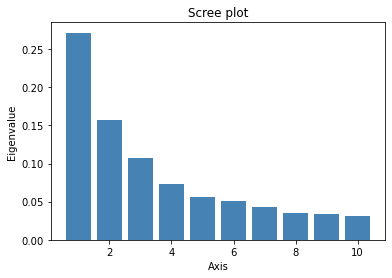

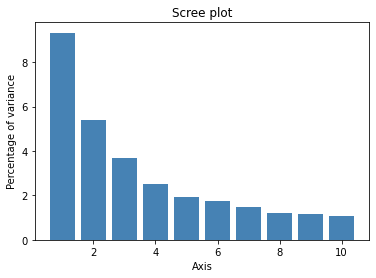

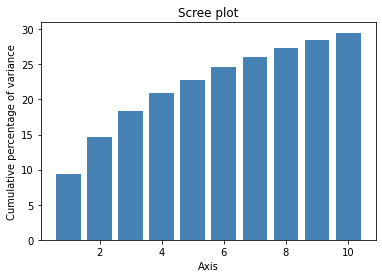

In [ ]:
my_mca.plot_eigenvalues()
my_mca.plot_eigenvalues(type="percentage")
my_mca.plot_eigenvalues(type="cumulative")

In [ ]:

df_rows = my_mca.row_topandas()
print( df_rows.iloc[0,0:10] )

row_coord_dim1     0.451576
row_coord_dim2    -0.037995
row_coord_dim3    -0.334580
row_coord_dim4    -0.053733
row_coord_dim5    -0.096507
row_coord_dim6     0.285603
row_coord_dim7    -0.128272
row_coord_dim8     0.358409
row_coord_dim9    -0.004826
row_coord_dim10    0.152253
Name: 00000001011840000, dtype: float64


In [ ]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ 0.45157649 -0.03799545 -0.33458018 ...  0.35840915 -0.00482612
   0.15225324]
 [-0.59621103  0.2023689  -0.3658026  ... -0.02639666  0.16973511
  -0.14203179]
 [ 0.23237714  0.42468111 -0.24134282 ...  0.07543953  0.24143536
  -0.16723533]
 ...
 [-0.38010746  0.20641407  0.25939709 ...  0.03993524 -0.21213478
  -0.02669939]
 [-0.33686811  0.08148178  0.32534309 ...  0.07548788 -0.54788416
  -0.04727613]
 [-0.26296565  0.18323252  0.65205936 ... -0.12544379 -0.42892436
  -0.06763684]]


In [ ]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[1.56364920e-03 1.91661803e-05 2.17385549e-03 ... 7.50005136e-03
  1.45188633e-06 1.51690633e-03]
 [2.72569147e-03 5.43700600e-04 2.59850650e-03 ... 4.06821540e-05
  1.79589020e-03 1.32006951e-03]
 [4.14060180e-04 2.39440804e-03 1.13109479e-03 ... 3.32279844e-04
  3.63360866e-03 1.83012915e-03]
 ...
 [1.10787167e-03 5.65654012e-04 1.30665347e-03 ... 9.31147682e-05
  2.80517631e-03 4.66475040e-05]
 [8.70154734e-04 8.81441083e-05 2.05548080e-03 ... 3.32705947e-04
  1.87117283e-02 1.46254613e-04]
 [5.30242716e-04 4.45735642e-04 8.25666196e-03 ... 9.18764860e-04
  1.14682681e-02 2.99358977e-04]]


In [ ]:

# Cos2 des points lignes
print(my_mca.row_cos2_)

[[7.08684738e-02 5.01711116e-04 3.89036958e-02 ... 4.46425115e-02
  8.09443671e-06 8.05607540e-03]
 [1.24029471e-01 1.42893479e-02 4.66894159e-02 ... 2.43121163e-04
  1.00523647e-02 7.03875748e-03]
 [1.91308535e-02 6.38959666e-02 2.06355628e-02 ... 2.01625523e-03
  2.06513903e-02 9.90840218e-03]
 ...
 [4.67032930e-02 1.37725171e-02 2.17502829e-02 ... 5.15522047e-04
  1.45464987e-02 2.30429175e-04]
 [3.67985238e-02 2.15293839e-03 3.43236743e-02 ... 1.84784315e-03
  9.73392677e-02 7.24760456e-04]
 [2.17664504e-02 1.05680453e-02 1.33833194e-01 ... 4.95322329e-03
  5.79096580e-02 1.43997912e-03]]


In [ ]:
df_cols = my_mca.col_topandas()
print(df_cols)

                    col_coord_dim1  col_coord_dim2  col_coord_dim3  \
%C17_MENPSEUL_0           0.594404       -0.845512        0.560304   
%C17_MENPSEUL_1           0.449997       -0.255168       -0.238514   
%C17_MENPSEUL_2           0.066731        0.418752       -0.424073   
%C17_MENPSEUL_3          -0.951223        0.491277        0.197591   
%C17_MENCOUPSENF_0       -1.242634       -0.122844        0.499051   
...                            ...             ...             ...   
%P16_POP_ETR_3           -1.031457        0.069539        0.309304   
%P16_POP_IMM_0            0.654407       -0.008528        0.576676   
%P16_POP_IMM_1            0.538106       -0.088227       -0.109207   
%P16_POP_IMM_2            0.078570        0.140252       -0.342304   
%P16_POP_IMM_3           -1.040701        0.008109        0.226413   

                    col_coord_dim4  col_coord_dim5  col_coord_dim6  \
%C17_MENPSEUL_0          -0.196678        0.383216       -0.465997   
%C17_MENPSEUL_1    

In [ ]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 0.59440439 -0.84551157  0.56030396 ... -0.09255602  0.07509359
  -0.48665328]
 [ 0.44999722 -0.25516789 -0.23851404 ...  0.51136318 -0.46300465
   0.43348584]
 [ 0.06673069  0.41875151 -0.42407263 ... -0.37178404  0.41175435
  -0.09859922]
 ...
 [ 0.53810561 -0.08822724 -0.10920698 ...  0.02720935 -0.15441969
  -0.00367305]
 [ 0.0785698   0.14025213 -0.34230449 ...  0.09193567  0.30289634
  -0.27927413]
 [-1.04070063  0.00810893  0.22641324 ...  0.13207459  0.01071242
   0.22762904]]


In [ ]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[4.12768503e-01 1.44602982e+00 9.28845520e-01 ... 7.62046046e-02
  5.35559864e-02 2.36118944e+00]
 [2.80441831e-01 1.56124403e-01 1.99528342e-01 ... 2.75747389e+00
  2.41353485e+00 2.22086402e+00]
 [6.49113016e-03 4.42565332e-01 6.63900630e-01 ... 1.53419263e+00
  2.00911671e+00 1.20938621e-01]
 ...
 [6.14260994e-01 2.85903113e-02 6.40725818e-02 ... 1.19586887e-02
  4.11228292e-01 2.44242340e-04]
 [7.89586281e-03 4.35614947e-02 3.79548270e-01 ... 8.23162865e-02
  9.53972933e-01 8.51331457e-01]
 [1.67074890e+00 1.75623221e-04 2.00270393e-01 ... 2.04893169e-01
  1.43911172e-03 6.82124859e-01]]


In [ ]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[9.53259046e-02 1.92879485e-01 8.47021264e-02 ... 2.31129952e-03
  1.52143243e-03 6.38978470e-02]
 [6.81771242e-02 2.19215409e-02 1.91534457e-02 ... 8.80395720e-02
  7.21754864e-02 6.32657788e-02]
 [1.60646003e-03 6.32603222e-02 6.48782497e-02 ... 4.98654942e-02
  6.11638809e-02 3.50724115e-03]
 ...
 [1.81897196e-01 4.88985919e-03 7.49189580e-03 ... 4.65079564e-04
  1.49794654e-02 8.47510382e-06]
 [1.87137110e-03 5.96303694e-03 3.55200672e-02 ... 2.56222182e-03
  2.78122830e-02 2.36434045e-02]
 [4.22362461e-01 2.56425061e-05 1.99911287e-02 ... 6.80255772e-03
  4.47516342e-05 2.02064030e-02]]


In [ ]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
#my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(20,10))

In [ ]:
# Mapping des points lignes
#my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(20,10))

In [ ]:
# Mapping des points colonnes
#my_mca.mapping_col(num_x_axis=1, num_y_axis=2,short_labels=False, figsize=(20,20))

In [ ]:
#my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False, figsize=(20, 10))

In [ ]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
#my_mca.plot_col_contrib(num_axis=1)

In [ ]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
#my_mca.plot_col_cos2(num_axis=1)

In [ ]:
X= my_mca.row_coord_
Data_init_cluster = pd.concat([data2_index, pd.DataFrame(X) ], axis=1)


In [ ]:
# Base de données qu'on obtient après l'ACM
Data_init_cluster


,IRIS,0,1,2,3,4,5,6,7,8,9
0,00000001011840000,0.451576,-0.037995,-0.334580,-0.053733,-0.096507,0.285603,-0.128272,0.358409,-0.004826,0.152253
1,00000002011850000,-0.596211,0.202369,-0.365803,0.222655,0.174773,0.356839,0.575775,-0.026397,0.169735,-0.142032
2,00000003011870000,0.232377,0.424681,-0.241343,0.384166,-0.254352,-0.209316,-0.349923,0.075440,0.241435,-0.167235
3,00000004011880000,0.459000,-0.334796,0.338630,-0.287378,-0.176088,-0.031932,0.147908,-0.012067,0.464508,-0.057907
4,00000005011890000,0.077617,-0.577255,-0.135926,0.016967,-0.467049,-0.204351,0.170026,-0.181829,-0.112079,0.267534
...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,-0.317864,0.244659,-0.055501,-0.362188,-0.279350,-0.332866,0.052760,-0.037444,-0.397565,-0.115332
48039,00049221974240102,-0.388168,0.150541,0.173707,-0.524475,-0.270541,-0.256609,-0.023109,0.018641,-0.632061,-0.029144
48040,00049222974240103,-0.380107,0.206414,0.259397,-0.584336,-0.127430,-0.227819,-0.103114,0.039935,-0.212135,-0.026699
48041,00049223974240104,-0.336868,0.081482,0.325343,-0.652232,-0.019270,-0.226373,-0.004453,0.075488,-0.547884,-0.047276


In [ ]:
###########################################################################################
#                                    KMEANS (PREMIER)
###########################################################################################

In [ ]:
# la courbe de l’inertie intra-classe en fonction de i (nombre de classes)
'''
a=[]
for i in range(2,150):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(Data_init_cluster.iloc[:,1:]) 
    a.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.scatter(range(2,150),a)
'''

'\na=[]\nfor i in range(2,150):\n    kmeans = KMeans(n_clusters=i) \n    kmeans.fit(Data_init_cluster.iloc[:,1:]) \n    a.append(kmeans.inertia_)\nplt.figure(figsize=(10,5))\nplt.scatter(range(2,150),a)\n'

In [ ]:
'''
n_cluster = 8 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 10 : nombre de partion
init='k-means++' :  choix des points de manière intelligente
'''
n_clusters_first=100
model = KMeans(n_clusters = n_clusters_first,init='k-means++', n_init=30, max_iter=100, tol = 0.01,algorithm ="full", random_state=0 )
print(model)

KMeans(algorithm='full', max_iter=100, n_clusters=100, n_init=30,
       random_state=0, tol=0.01)


In [ ]:
model.fit(Data_init_cluster.iloc[:,1:])
# les classes après kmeans
new_labels_kmeans = model.predict(Data_init_cluster.iloc[:,1:])
print(new_labels_kmeans)
print("Nombre d'itération : ",model.n_iter_)


[85 62 27 ...  6  6  1]
Nombre d'itération :  69


In [ ]:
len(model.labels_)

48043

In [ ]:
#nombre d'individus dans chaque groupe
nb_after_kmeans = np.array(np.unique( model.predict(Data_init_cluster.iloc[:,1:]) , return_counts=True)).T
nb_after_kmeans

array([[  0, 437],
       [  1, 171],
       [  2, 285],
       [  3, 478],
       [  4, 597],
       [  5, 450],
       [  6, 218],
       [  7, 334],
       [  8, 495],
       [  9, 344],
       [ 10, 599],
       [ 11, 769],
       [ 12, 451],
       [ 13, 636],
       [ 14, 265],
       [ 15, 386],
       [ 16, 479],
       [ 17, 643],
       [ 18, 484],
       [ 19, 554],
       [ 20, 561],
       [ 21, 469],
       [ 22, 587],
       [ 23, 506],
       [ 24, 660],
       [ 25, 557],
       [ 26, 523],
       [ 27, 546],
       [ 28, 541],
       [ 29, 387],
       [ 30, 427],
       [ 31, 449],
       [ 32, 609],
       [ 33, 327],
       [ 34, 335],
       [ 35, 356],
       [ 36, 602],
       [ 37, 511],
       [ 38, 367],
       [ 39, 557],
       [ 40, 506],
       [ 41, 403],
       [ 42, 500],
       [ 43, 550],
       [ 44, 589],
       [ 45, 692],
       [ 46, 232],
       [ 47, 482],
       [ 48, 407],
       [ 49, 464],
       [ 50, 351],
       [ 51, 462],
       [ 52,

In [ ]:
# centre de gravité
model.cluster_centers_

array([[ 4.29894941e-01, -2.37821243e-02,  1.49300654e-01,
         1.65596772e-01,  6.73056189e-02,  1.14176658e-01,
        -2.09138552e-01,  1.76933404e-01,  4.34073505e-02,
        -1.88490148e-01],
       [-2.74214160e-01,  3.31192266e-02,  5.02329882e-01,
        -1.46360878e-01,  6.51742298e-02, -2.47895630e-01,
        -1.06482941e-01, -1.51497351e-01, -9.31525283e-02,
        -7.49743743e-02],
       [-9.12119908e-01,  1.08523955e-01,  3.73934675e-01,
         3.11670312e-01,  1.17266252e-01,  2.45541872e-02,
         7.18779127e-02,  5.80471660e-02, -2.18201389e-01,
        -2.97065113e-02],
       [ 1.00120277e-01, -3.81765349e-01, -4.87870958e-01,
         9.13752895e-03, -2.83997738e-01, -1.49648528e-01,
         5.06110147e-03, -9.50826207e-02,  2.63294138e-02,
         1.50541580e-01],
       [ 3.99555531e-01,  3.52422552e-01,  6.38686180e-02,
        -6.86610469e-02, -1.09157916e-01,  1.72259645e-01,
        -1.89201572e-01, -6.26559648e-02,  1.96881881e-01,
        -9.

In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans = pd.DataFrame(new_labels_kmeans ,columns=["class_kmeans"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans = pd.concat([data2_index, df_resultat_kmeans], axis=1 ) #data2_index
ident_class_kmeans


,IRIS,class_kmeans
0,00000001011840000,85
1,00000002011850000,62
2,00000003011870000,27
3,00000004011880000,71
4,00000005011890000,89
...,...,...
48038,00049220974240101,6
48039,00049221974240102,6
48040,00049222974240103,6
48041,00049223974240104,6


In [ ]:
#pondération du centre de gravité de chacun des clusters
Data_init_classi = model.cluster_centers_*(nb_after_kmeans[:,1].reshape(n_clusters_first,1))
Data_init_classi

array([[ 1.87864089e+02, -1.03927883e+01,  6.52443860e+01,
         7.23657892e+01,  2.94125555e+01,  4.98951997e+01,
        -9.13935473e+01,  7.73198976e+01,  1.89690122e+01,
        -8.23701946e+01],
       [-4.68906213e+01,  5.66338776e+00,  8.58984099e+01,
        -2.50277101e+01,  1.11447933e+01, -4.23901528e+01,
        -1.82085829e+01, -2.59060470e+01, -1.59290823e+01,
        -1.28206180e+01],
       [-2.59954174e+02,  3.09293271e+01,  1.06571382e+02,
         8.88260389e+01,  3.34208819e+01,  6.99794336e+00,
         2.04852051e+01,  1.65434423e+01, -6.21873959e+01,
        -8.46635573e+00],
       [ 4.78574926e+01, -1.82483837e+02, -2.33202318e+02,
         4.36773884e+00, -1.35750919e+02, -7.15319962e+01,
         2.41920650e+00, -4.54494927e+01,  1.25854598e+01,
         7.19588751e+01],
       [ 2.38534652e+02,  2.10396263e+02,  3.81295649e+01,
        -4.09906450e+01, -6.51672757e+01,  1.02839008e+02,
        -1.12953339e+02, -3.74056110e+01,  1.17538483e+02,
        -5.

In [ ]:
#Dataframe de la pondération du centre de gravité de chacun des clusters
Data_init_classi = pd.DataFrame(Data_init_classi)
Data_init_classi

,0,1,2,3,4,5,6,7,8,9
0,187.864089,-10.392788,65.244386,72.365789,29.412555,49.895200,-91.393547,77.319898,18.969012,-82.370195
1,-46.890621,5.663388,85.898410,-25.027710,11.144793,-42.390153,-18.208583,-25.906047,-15.929082,-12.820618
2,-259.954174,30.929327,106.571382,88.826039,33.420882,6.997943,20.485205,16.543442,-62.187396,-8.466356
3,47.857493,-182.483837,-233.202318,4.367739,-135.750919,-71.531996,2.419207,-45.449493,12.585460,71.958875
4,238.534652,210.396263,38.129565,-40.990645,-65.167276,102.839008,-112.953339,-37.405611,117.538483,-56.630212
...,...,...,...,...,...,...,...,...,...,...
95,-242.658338,59.969470,-106.057105,-250.983082,40.801322,-57.212718,-44.763282,-45.453410,-31.634473,-57.137789
96,45.892072,89.988112,-54.811236,110.831321,69.449802,-79.183636,-26.291200,40.916736,-38.859139,22.189814
97,160.873753,-215.542383,-138.008528,-0.397998,24.892451,-8.277885,33.267412,65.600296,-66.146262,100.863664
98,240.718547,100.624497,226.585719,-87.468841,39.603406,93.972832,-69.344411,-101.988527,73.463344,-91.325829


In [ ]:
# changement d'échelle si les valeurs sont trop petites
# Data_init_classi=Data_init_classi*10000

In [ ]:
###########################################################################################
#                                    CAH
###########################################################################################

In [ ]:
@interact(nc=(1,10,1))
def graphique_clustering_Ward(nc):
    Z = linkage(Data_init_classi,method='ward',metric='euclidean')
    clusters_temp=fcluster(Z, nc, criterion='maxclust') 
    plt.figure(figsize=[10,8]);
    plt.scatter(Data_init_classi.iloc[:, 0], Data_init_classi.iloc[:, 1], s=30,c=clusters_temp);
    plt.title('Ward linkage with scipy, n_cluster='+str(nc));

In [ ]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

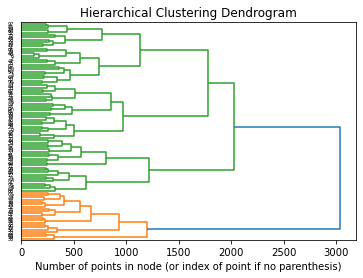

In [ ]:
# train cluster model
inithc_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
inithc_model.fit(Data_init_classi)

# generate visualization
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 4)
 
plot_dendrogram(inithc_model,orientation='right', truncate_mode='level', p=7) # 6 levels max
plt.title('Hierarchical Clustering Dendrogram')
_ = plt.xlabel('Number of points in node (or index of point if no parenthesis)')


In [ ]:
results = []
 
# train models with n number of clusters * linkages
for a in ['ward']:  # linkages
    for n in range(2,21): # evaluate 2 to 20 clusters
 
        # fit the algorithm with n clusters
        model_temp = AgglomerativeClustering(n_clusters=n, linkage=a)
        clusters_temp = model_temp.fit(Data_init_classi).labels_
 
        # capture the inertia & silhouette scores for this value of n
        results += [ (n, a, silhouette_score(Data_init_classi, clusters_temp)) ]

results_pd = pd.DataFrame(results, columns=['n', 'linkage', 'silhouette'])
display(results_pd)

,n,linkage,silhouette
0,2,ward,0.289542
1,3,ward,0.203947
2,4,ward,0.185198
3,5,ward,0.170980
4,6,ward,0.173950
5,7,ward,0.163354
6,8,ward,0.161336
7,9,ward,0.157961
8,10,ward,0.162973
9,11,ward,0.165575


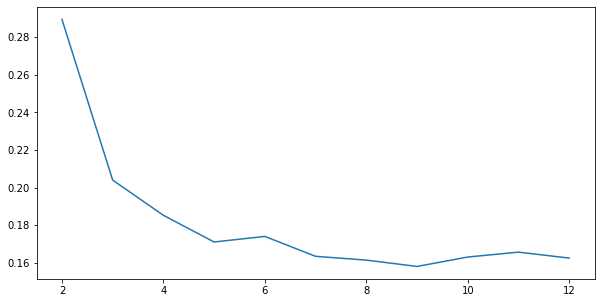

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results_pd.loc[:10,"n"],results_pd.loc[:10,"silhouette"])

In [ ]:
model_test = AgglomerativeClustering(n_clusters=7, linkage="ward")
clusters_test = model_test.fit(Data_init_classi).labels_

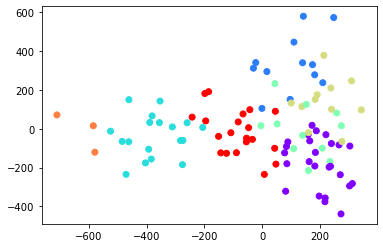

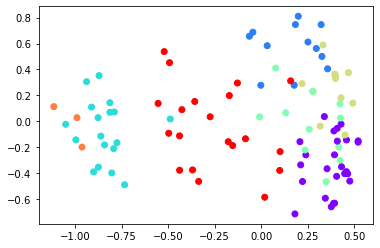

In [ ]:
plt.figure()
plt.scatter(Data_init_classi.iloc[:,0], Data_init_classi.iloc[:,1],
            c = model_test.fit_predict(Data_init_classi), cmap ='rainbow')
plt.figure()
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
            c =model_test.fit_predict(Data_init_classi), cmap ='rainbow')

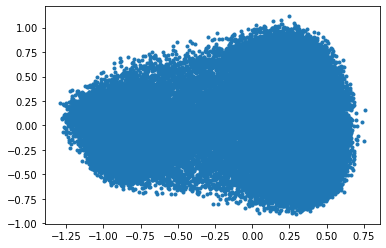

In [ ]:
plt.figure()
plt.plot(Data_init_cluster.iloc[:,1], Data_init_cluster.iloc[:,2], ".")


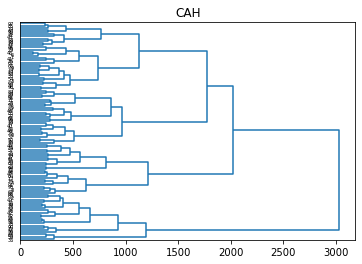

In [ ]:
#générer la matrice des liens
Z = linkage(Data_init_classi,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=1)
plt.show()


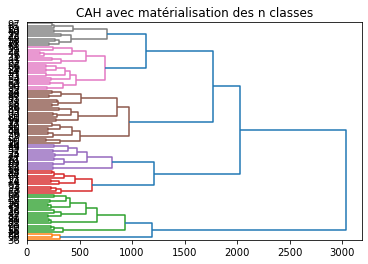

[5 6 2 6 3 5 6 6 3 6 4 4 2 5 6 5 2 3 7 7 5 2 2 4 3 4 5 4 5 6 6 2 7 6 6 6 1
 5 5 4 5 6 2 7 4 5 6 3 5 2 5 7 2 6 6 5 2 4 7 1 7 5 6 6 3 2 6 3 3 4 5 5 7 7
 4 2 2 5 2 2 2 4 2 5 5 7 5 5 1 5 2 3 5 3 4 6 6 7 3 5]
[36 59 88 76 31 78 79 80 56 42 22 21 82 75 16 49 12 52  2 90 65 64 93  4
 91 68  8 98 47 67 24 17 69 57 39 44 27 94 81 25 23 10 74 11 71 92 89 61
 86 84 83 77 70 87 55  0 99 26 20 50 15 48  5 37 45 28 38 13 40 14  7  6
  3  1 95 96  9 29 53 54 33 34 35 62 41 30 66 46 63 97 51 58 60 43 73 85
 18 19 72 32]


In [ ]:
''' FAIRE ATTENTION A CETTE ETAPE CAR IL FAUT CHOISIR LA COUPURE (t et color_threshold changent) '''

#matérialisation des n classes (hauteur t = 7)
plt.title('CAH avec matérialisation des n classes')
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=1100,leaf_font_size=10)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de n groupes obtenus
#groupes_cah = fcluster(Z,t=950,criterion='distance')
groupes_cah = fcluster(Z,t=7,criterion='maxclust')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
print(idg)
#affichage des observations et leurs groupes
#print(pd.DataFrame(Data_init_classi.index[idg],groupes_cah[idg]))


In [ ]:
#Dataframe qui relie les classes obtenues du kmeans et celles de la cah
a = pd.DataFrame( Data_init_classi.index[idg], columns=["class_kmeans"])
b = pd.DataFrame( groupes_cah[idg], columns = ["class_cah"])
link_class_kmeans_cah = pd.concat([a, b], axis=1 ) 
link_class_kmeans_cah


,class_kmeans,class_cah
0,36,1
1,59,1
2,88,1
3,76,2
4,31,2
...,...,...
95,85,7
96,18,7
97,19,7
98,72,7


In [ ]:
# nombre de madalités du kmeans dans chacune de classes de la cah
link_class_kmeans_cah["class_cah"].value_counts()


5    25
6    20
2    18
4    12
3    11
7    11
1     3
Name: class_cah, dtype: int64

In [ ]:
# A REVOIR, INDEX
points_init=pd.DataFrame(model.cluster_centers_)
points_init

,0,1,2,3,4,5,6,7,8,9
0,0.429895,-0.023782,0.149301,0.165597,0.067306,0.114177,-0.209139,0.176933,0.043407,-0.188490
1,-0.274214,0.033119,0.502330,-0.146361,0.065174,-0.247896,-0.106483,-0.151497,-0.093153,-0.074974
2,-0.912120,0.108524,0.373935,0.311670,0.117266,0.024554,0.071878,0.058047,-0.218201,-0.029707
3,0.100120,-0.381765,-0.487871,0.009138,-0.283998,-0.149649,0.005061,-0.095083,0.026329,0.150542
4,0.399556,0.352423,0.063869,-0.068661,-0.109158,0.172260,-0.189202,-0.062656,0.196882,-0.094858
...,...,...,...,...,...,...,...,...,...,...
95,-0.554014,0.136917,-0.242140,-0.573021,0.093154,-0.130623,-0.102199,-0.103775,-0.072225,-0.130452
96,0.158796,0.311378,-0.189658,0.383499,0.240311,-0.273992,-0.090973,0.141580,-0.134461,0.076781
97,0.349726,-0.468570,-0.300019,-0.000865,0.054114,-0.017995,0.072320,0.142609,-0.143796,0.219269
98,0.429855,0.179687,0.404617,-0.156194,0.070720,0.167809,-0.123829,-0.182122,0.131185,-0.163082


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans et de la cah 
ident_class_kmeans_cah=ident_class_kmeans
ident_class_kmeans_cah=pd.merge(ident_class_kmeans_cah, link_class_kmeans_cah)
ident_class_kmeans_cah

,IRIS,class_kmeans,class_cah
0,00000001011840000,85,7
1,00000050012410000,85,7
2,00000148013370000,85,7
3,00000161013520000,85,7
4,00000270020110000,85,7
...,...,...,...
48038,00047641940370104,90,2
48039,00047795940670108,90,2
48040,00047919940800101,90,2
48041,00047923940800201,90,2


In [ ]:
link_class_kmeans_cah.iloc[:,1].value_counts()

5    25
6    20
2    18
4    12
3    11
7    11
1     3
Name: class_cah, dtype: int64

In [ ]:
#création des centres de gravité de chacune des classes obtenues à partir du cah
#ajouter manuellement la liste de liste par rapport au nombre de classes sollicité
#les centres de gravité ne sont pas pondérés 
#les groupes du cah sont numérotés à partir de 1 
points_init_kmeans_final=[[],[],[],[],[],[],[]]
for k in range(1,len(link_class_kmeans_cah.iloc[:,1].value_counts())+1):
    bbb=link_class_kmeans_cah[link_class_kmeans_cah["class_cah"] ==k] 
    #print(bbb)
    for i in bbb["class_kmeans"]:
        #print("i : ",i); print("")
        points_init_kmeans_final[k-1].append(points_init[points_init.index ==i])
    points_init_kmeans_final[k-1] = np.mean(points_init_kmeans_final[k-1], axis=0).tolist()
    
# conversion de la liste d'array en array uniquement et suppression d'une dimension (car il en a 3)
points_init_kmeans_final=np.asarray(points_init_kmeans_final)[:,0,:]
points_init_kmeans_final

"""
# AUTRE OPTION : 

dim_lignes = len(points_init_kmeans_final)
dim_colonnes = len(points_init_kmeans_final[0][0])
print(dim_lignes, dim_colonnes)
temp_matrice_boucle = np.zeros((dim_lignes, dim_colonnes))
print(temp_matrice_boucle.shape) 

for i in range(dim_lignes):
    print("-"*10,i)
    #print(temp_matrice_bouble[i,:])
    #print(points_init_kmeans_final)
    #temp_matrice_bouble[i,:] = np.asarray(points_init_kmeans_final[i][0]).reshape((1,dim_colonnes))
    for j in range(dim_colonnes):
        print(j)
        #print(points_init_kmeans_final[i][0][j])
        temp_matrice_boucle[i,j] = points_init_kmeans_final[i][0][j]

""" 


'\n# AUTRE OPTION : \n\ndim_lignes = len(points_init_kmeans_final)\ndim_colonnes = len(points_init_kmeans_final[0][0])\nprint(dim_lignes, dim_colonnes)\ntemp_matrice_boucle = np.zeros((dim_lignes, dim_colonnes))\nprint(temp_matrice_boucle.shape) \n\nfor i in range(dim_lignes):\n    print("-"*10,i)\n    #print(temp_matrice_bouble[i,:])\n    #print(points_init_kmeans_final)\n    #temp_matrice_bouble[i,:] = np.asarray(points_init_kmeans_final[i][0]).reshape((1,dim_colonnes))\n    for j in range(dim_colonnes):\n        print(j)\n        #print(points_init_kmeans_final[i][0][j])\n        temp_matrice_boucle[i,j] = points_init_kmeans_final[i][0][j]\n\n'

In [ ]:
points_init_kmeans_final

array([[-1.02294750e+00, -2.07876058e-02,  2.25869234e-01,
        -5.23826888e-01,  3.51539740e-02, -1.61638835e-01,
        -1.80951586e-01,  1.55329792e-01, -9.23336901e-02,
        -2.07433268e-02],
       [-8.41043465e-01, -7.79628598e-02,  9.92990739e-02,
         1.26399101e-01,  2.00551021e-03,  1.44307818e-01,
         4.44759880e-02,  1.29487013e-02,  3.37469497e-02,
         1.96754583e-02],
       [ 3.80664597e-01,  2.45727310e-01,  1.91833717e-01,
        -1.45417359e-01,  6.12827144e-02,  1.36291551e-01,
        -6.38134856e-02, -9.25041058e-02,  3.50514617e-02,
        -7.00873030e-03],
       [ 1.70147588e-01,  5.71856956e-01,  2.09701955e-02,
         1.51456941e-01, -1.00053290e-01, -1.66779799e-01,
         5.62477309e-03,  5.40519169e-02, -2.55425943e-03,
         4.67472648e-02],
       [ 3.79824568e-01, -3.31682215e-01,  1.25106259e-01,
         6.87615225e-03,  4.57442120e-02, -3.23544176e-02,
         4.39715770e-02,  1.16912992e-02, -8.45329278e-03,
        -3.

In [ ]:
###########################################################################################
#                                    KMEANS (SECONDE)
###########################################################################################

In [ ]:
'''
n_cluster = 7 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 1 : nombre de partion
init= np.array :  choix des points
'''

n_clusters_first=7
model_kmeans_final = KMeans(n_clusters = n_clusters_first,init=points_init_kmeans_final, n_init=1, max_iter=30, tol = 0.01,algorithm ="full" )
print(model_kmeans_final)

KMeans(algorithm='full',
       init=array([[-1.02294750e+00, -2.07876058e-02,  2.25869234e-01,
        -5.23826888e-01,  3.51539740e-02, -1.61638835e-01,
        -1.80951586e-01,  1.55329792e-01, -9.23336901e-02,
        -2.07433268e-02],
       [-8.41043465e-01, -7.79628598e-02,  9.92990739e-02,
         1.26399101e-01,  2.00551021e-03,  1.44307818e-01,
         4.44759880e-02,  1.29487013e-02,  3.37469497e-02,
         1.96754583e-02],
       [...
       [-2.51817779e-01, -4.60590020e-02, -2.55070470e-01,
        -9.45000601e-03,  5.96985875e-02, -1.63011247e-01,
        -6.15460630e-02, -7.08566096e-02,  4.76298058e-04,
         7.58807852e-03],
       [ 2.74394980e-01, -3.32692315e-02, -4.26588516e-01,
        -1.30298928e-02, -1.03062125e-01,  1.09208525e-01,
        -2.75025042e-02,  4.62545374e-02, -5.62192096e-02,
        -4.11518017e-02]]),
       max_iter=30, n_clusters=7, n_init=1, tol=0.01)


In [ ]:
model_kmeans_final.fit(Data_init_cluster.iloc[:,1:])
new_labels_kmeans_final= model_kmeans_final.predict(Data_init_cluster.iloc[:,1:])
print("Labels : ",new_labels_kmeans_final)
print("Nombre d'itérations avant la convergence : ",model_kmeans_final.n_iter_)
print("Inertia : ",model_kmeans_final.inertia_)

Labels :  [6 1 3 ... 0 0 0]
Nombre d'itérations avant la convergence :  8
Inertia :  18244.61007309479


In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans_final = pd.DataFrame(new_labels_kmeans_final ,columns=["class_kmeans_final"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans_final = pd.concat([data2_index, df_resultat_kmeans_final], axis=1 ) #data2_index
# incrémentation des modalités d'une unité pour que ça reste homogène avec les autres modalités
ident_class_kmeans_final["class_kmeans_final"] = ident_class_kmeans_final["class_kmeans_final"]+1
ident_class_kmeans_final


,IRIS,class_kmeans_final
0,00000001011840000,7
1,00000002011850000,2
2,00000003011870000,4
3,00000004011880000,5
4,00000005011890000,5
...,...,...
48038,00049220974240101,1
48039,00049221974240102,1
48040,00049222974240103,1
48041,00049223974240104,1


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans,de la cah
# et du kmeans_final
ident_class_kmeans_cah_kmeans_final=pd.merge(ident_class_kmeans_cah,ident_class_kmeans_final)
ident_class_kmeans_cah_kmeans_final

,IRIS,class_kmeans,class_cah,class_kmeans_final
0,00000001011840000,85,7,7
1,00000050012410000,85,7,7
2,00000148013370000,85,7,7
3,00000161013520000,85,7,7
4,00000270020110000,85,7,7
...,...,...,...,...
48038,00047641940370104,90,2,2
48039,00047795940670108,90,2,2
48040,00047919940800101,90,2,2
48041,00047923940800201,90,2,2


In [ ]:
ident_class_kmeans_cah_kmeans_final["class_cah"].value_counts()

5    12648
2     7923
6     6925
4     6779
3     6172
7     5765
1     1831
Name: class_cah, dtype: int64

In [ ]:
ident_class_kmeans_cah_kmeans_final["class_kmeans_final"].value_counts()

5    8222
3    7824
7    7266
4    7143
6    6470
2    5754
1    5364
Name: class_kmeans_final, dtype: int64

In [ ]:
( (ident_class_kmeans_cah_kmeans_final["class_cah"]-(ident_class_kmeans_cah_kmeans_final["class_kmeans_final"]))!=0 ).sum()

15066

In [ ]:
# identfiants avec huit premiers caractères (Même référence, modifier après )
ident_huit_carac_class_kmeans_cah_kmeans_final = ident_class_kmeans_cah_kmeans_final.copy()
for i in range(ident_huit_carac_class_kmeans_cah_kmeans_final.shape[0]) :
    ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0] = ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0][0:8]
ident_huit_carac_class_kmeans_cah_kmeans_final

,IRIS,class_kmeans,class_cah,class_kmeans_final
0,00000001,85,7,7
1,00000050,85,7,7
2,00000148,85,7,7
3,00000161,85,7,7
4,00000270,85,7,7
...,...,...,...,...
48038,00047641,90,2,2
48039,00047795,90,2,2
48040,00047919,90,2,2
48041,00047923,90,2,2


In [ ]:
confusion_matrix(ident_huit_carac_class_kmeans_cah_kmeans_final["class_cah"],ident_huit_carac_class_kmeans_cah_kmeans_final["class_kmeans_final"])

array([[1831,    0,    0,    0,    0,    0,    0],
       [2580, 5174,    0,    5,    0,  164,    0],
       [   0,    0, 4831,  708,   79,   20,  534],
       [   0,   15,  265, 5805,    4,  422,  268],
       [   1,    2, 2412,   11, 7658,  133, 2431],
       [ 952,  563,   65,  512,  352, 4063,  418],
       [   0,    0,  251,  102,  129, 1668, 3615]], dtype=int64)

In [ ]:
print((2660+4763+6225+3479+4556+5003+7677)/48043*100)
print((1905+4952+5201+4220+5956+3509+7360)/48043*100)
print((2311+4341+5476+6997+6027+3308+3600)/48043*100)

71.52550839872615
68.90285785650356
66.73188601877484


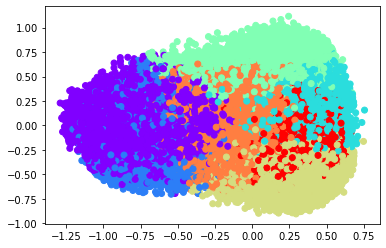

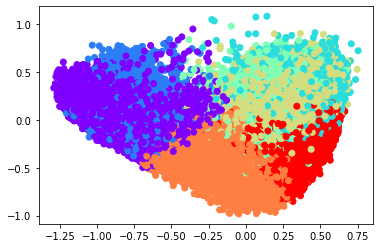

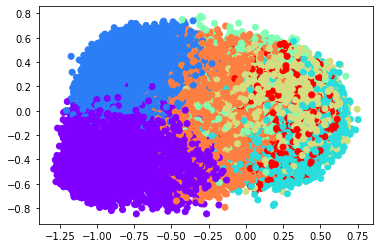

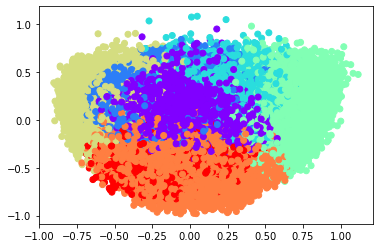

In [ ]:
plt.figure()
plt.scatter(Data_init_cluster.iloc[:,1], Data_init_cluster.iloc[:,2],
            c = new_labels_kmeans_final, cmap ='rainbow')

plt.figure()
plt.scatter(Data_init_cluster.iloc[:,1], Data_init_cluster.iloc[:,3],
            c = new_labels_kmeans_final, cmap ='rainbow')

plt.figure()
plt.scatter(Data_init_cluster.iloc[:,1], Data_init_cluster.iloc[:,4],
            c = new_labels_kmeans_final, cmap ='rainbow')

plt.figure()
plt.scatter(Data_init_cluster.iloc[:,2], Data_init_cluster.iloc[:,3],
            c = new_labels_kmeans_final, cmap ='rainbow')

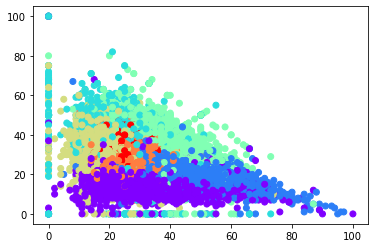

In [ ]:

plt.figure()
plt.scatter(data_sans_nan.iloc[:,1], data_sans_nan.iloc[:,2],
            c = new_labels_kmeans_final, cmap ='rainbow')

In [ ]:
###########################################################################################
#        LECTURE DES INDIVIDUS DES GROUPES DE SPAD ET COMPARAISON DES METHODES
###########################################################################################

In [ ]:
%run lecture_individus.ipynb

In [ ]:
dff_1, tkt=groupe_individus(path='C:/Users/Christian/Desktop/Doc_Insee_classification/FINAL17N_1.LST', dff = [[],[],[],[],[]], nb_gr=5, tkt=0)
dff_2, tkt=groupe_individus(path='C:/Users/Christian/Desktop/Doc_Insee_classification/FINAL17N_1.LST', dff = [[],[],[],[],[],[]], nb_gr=6, tkt =tkt)
dff_3, tkt=groupe_individus(path='C:/Users/Christian/Desktop/Doc_Insee_classification/FINAL17N_1.LST', dff = [[],[],[],[],[],[],[]], nb_gr=7, tkt =tkt)
dff_4, tkt=groupe_individus(path='C:/Users/Christian/Desktop/Doc_Insee_classification/FINAL17N_1.LST', dff = [[],[],[],[],[],[],[],[]], nb_gr=8, tkt =tkt)


start, j= 3724
stop, j= 5175
fin de boucle pour i = 1
taille :  8673

start, j= 5175
stop, j= 7047
fin de boucle pour i = 2
taille :  11202

start, j= 7047
stop, j= 8436
fin de boucle pour i = 3
taille :  8302

start, j= 8436
stop, j= 9915
fin de boucle pour i = 4
taille :  8844

start, j= 9915
stop, j= 11755
fin de boucle pour i = 5
taille :  11022

fin grande boucle
start, j= 11901
stop, j= 13345
fin de boucle pour i = 1
taille :  8633

start, j= 13345
stop, j= 15199
fin de boucle pour i = 2
taille :  11090

start, j= 15199
stop, j= 16523
fin de boucle pour i = 3
taille :  7911

start, j= 16523
stop, j= 17994
fin de boucle pour i = 4
taille :  8794

start, j= 17994
stop, j= 18962
fin de boucle pour i = 5
taille :  5773

start, j= 18962
stop, j= 19939
fin de boucle pour i = 6
taille :  5842

fin grande boucle
start, j= 20096
stop, j= 21265
fin de boucle pour i = 1
taille :  6981

start, j= 21265
stop, j= 22423
fin de boucle pour i = 2
taille :  6914

start, j= 22423
stop, j= 23800
fin

In [ ]:
val_liste=[0]
val_somme=0
for k in dff_3:
    val_somme= val_somme+len(k)
    val_liste.append(val_somme)
print(val_liste)


[0, 6981, 13895, 22127, 29111, 36584, 42220, 48043]


In [ ]:
dff_one_dim = []
for i in dff_3:
    dff_one_dim.extend(i)
dff_one_dim = pd.DataFrame(dff_one_dim, columns=["IRIS"])
dff_one_dim["class_logiciel_spad"]=0

for k in range(7):
    for i in range(val_liste[k] ,val_liste[k+1]):
        dff_one_dim.iloc[i,1]= k+1
    
dff_one_dim
    

,IRIS,class_logiciel_spad
0,00000004,1
1,00000005,1
2,00000012,1
3,00000013,1
4,00000015,1
...,...,...
48038,00049099,7
48039,00049100,7
48040,00049101,7
48041,00049102,7


In [ ]:
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad =  pd.merge(ident_huit_carac_class_kmeans_cah_kmeans_final,dff_one_dim)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad

,IRIS,class_kmeans,class_cah,class_kmeans_final,class_logiciel_spad
0,00000001,85,7,7,2
1,00000050,85,7,7,2
2,00000148,85,7,7,2
3,00000161,85,7,7,2
4,00000270,85,7,7,2
...,...,...,...,...,...
48038,00047641,90,2,2,7
48039,00047795,90,2,2,7
48040,00047919,90,2,2,7
48041,00047923,90,2,2,7


In [ ]:
confusion_matrix(com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"],com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] )

array([[   4,    0,    1,   46,    6, 5140,  167],
       [   5,    0,    0,   47,   12,  247, 5443],
       [  85,  640, 6742,   16,  335,    4,    2],
       [   2,   24,  247,   68, 6764,   26,   12],
       [6383, 1540,  232,   61,    0,    1,    5],
       [  61,   87,   34, 5641,  235,  218,  194],
       [ 441, 4623,  976, 1105,  121,    0,    0]], dtype=int64)

In [ ]:
print( (6383+4623+6742+5641+6764+5140+5443)/48043*100) #1-5, 2-7, 3-3, 4-6, 5-4, 6-1,7-2
print( (6482+0+5416+6025+6704+4027+4450)/48043*100)
print( (6686+0+6846+6113+6796+3956+4350)/48043*100)
print( (5784+1255+4795+3112+6004+4947+5141)/48043*100)
print( (6408+0+6503+5608+6812+4007+4649)/48043*100)
print( (6363+5053+5356+5968+5081+5359+5240)/48043*100)
print( (5264+2383+4625+5923+5055+5223+5468)/48043*100)
print( (6308+4765+6844+5947+6691+5418+5205)/48043*100)
print( (5876+739+4808+3268+5617+5211+5016)/48043*100)
print( (6262+3231+5375+4271+6552+4933+5325)/48043*100)
print( (6095+4676+3636+4356+2635+5222+5084)/48043*100)

84.79070832379327
68.90493932518785
72.32479237349874
64.60462502341652
70.74287617342797
79.97002685094603
70.64712861395
85.71071748225549
63.55764627521179
74.82671773203172
65.99088316716275


In [ ]:
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].value_counts()

3    8232
5    7473
4    6984
1    6981
2    6914
7    5823
6    5636
Name: class_logiciel_spad, dtype: int64

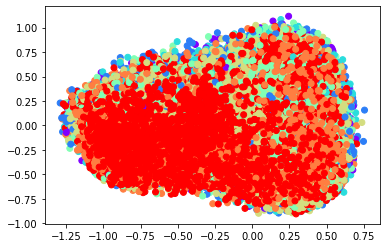

In [ ]:
plt.figure()
plt.scatter(Data_init_cluster.iloc[:,1], Data_init_cluster.iloc[:,2],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"], cmap ='rainbow')


In [ ]:
#########################################################################
#########################################################################

In [ ]:
# jointure #ident_class_kmeans_cah_kmeans_final
table_suite=pd.merge(data_sans_nan, ident_class_kmeans_final)
table_suite

,IRIS,%C17_MENPSEUL,%C17_MENCOUPSENF,%C17_MENFAMMONO,%C17_PMEN_MENPSEUL,%P17_POP1524,%P17_POP2554,%P17_POP5579,%P17_POP80P,%P17_POP15P_PACSEE,%P17_POP15P_CONCUB_UNION_LIBRE,%P17_POP15P_VEUFS,%P17_POP15P_DIVORCEE,%P17_POP15P_CELIBATAIRE,%C17_MEN_CS1,%C17_MEN_CS2,%C17_MEN_CS3,%C17_MEN_CS4,%C17_MEN_CS5,%C17_MEN_CS6,%C17_MEN_CS7,%C17_MEN_CS8,%C17_NE24F0,%C17_NE24F4P,%P17_ACT1564,%P17_ACT1524,%P17_CHOM1564,%P17_CHOM1524,%P17_ETUD1564,%P17_AINACT1564,%P17_SAL15P,%P17_NSAL15P,%P17_SAL15P_CDI,%P17_SAL15P_EMPAID,%P17_NSAL15P_INDEP,%P17_ACTOCC15P_ILT1,%P17_ACTOCC15P_ILT2P,%C17_ACTOCC15P_VOIT,%C17_ACTOCC15P_TCOM,%P17_POP0205,%P17_SCOL0205,%P17_NSCOL15P_DIPLMIN,%P17_NSCOL15P_CAPBEP,%P17_NSCOL15P_BAC,%P17_NSCOL15P_SUP5,%P16_RP,%P16_RSECOCC,%P16_MAISON,%P16_APPART,%P16_RP_5P,%P16_RP_120P,%P16_RP_ACH19,%P16_RP_ACH45,%P16_RP_ACH70,%P16_RP_ACH90,%P16_RP_ACH05,%P16_RP_ACH13,%P16_PMEN_ANEM0002,%P16_PMEN_ANEM0204,%P16_PMEN_ANEM0509,%P16_PMEN_ANEM10P,%P16RP_PROP,%P16RP_LOC,%P16RP_LOCHLMV,%P16RP_CLIM,%P16RP_GARL,%P16RP_VOIT1,%P16RP_VOIT2P,%P16_POP_ETR,%P16_POP_IMM,class_kmeans_final
0,00000001011840000,35,30,4,35,10,49,35,3,7,15,6,7,20,0,5,7,11,27,11,32,4,47,2,77,35,7,11,8,6,44,7,38,0,5,15,82,91,0,3,83,20,33,18,4,69,23,95,4,53,27,34,7,8,29,14,6,8,15,15,60,79,17,3,0,86,44,48,0,1,7
1,00000002011850000,46,27,5,46,12,36,38,12,3,9,10,8,28,1,4,3,12,18,12,37,8,57,2,72,46,5,7,9,8,39,5,33,0,3,72,31,75,1,3,70,21,27,17,4,77,9,47,49,29,15,14,10,25,31,10,6,15,22,15,45,45,52,19,0,71,52,26,5,8,2
2,00000003011870000,35,37,14,35,7,39,45,8,3,11,6,8,21,3,11,8,14,16,8,37,1,67,0,76,45,5,7,4,7,37,13,31,0,8,40,68,90,0,4,82,15,31,18,8,47,43,78,19,57,33,51,5,8,16,13,5,11,17,19,52,73,21,5,0,77,48,44,7,8,4
3,00000004011880000,17,23,12,17,10,52,29,6,4,10,5,3,16,4,2,6,23,17,23,19,4,42,0,81,60,10,20,5,4,45,10,42,0,6,15,75,89,3,6,71,27,28,16,3,92,3,99,0,59,39,35,6,1,21,14,20,8,11,24,55,90,9,0,0,83,35,61,0,1,5
4,00000005011890000,26,26,9,26,11,55,28,3,6,15,3,4,21,0,0,8,24,17,30,13,5,42,1,81,56,6,11,5,7,57,4,51,0,2,12,81,91,2,5,69,14,34,19,6,82,6,79,19,49,24,14,11,24,21,15,12,11,25,15,48,64,33,8,0,86,33,61,6,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48038,00049220974240101,33,16,19,33,12,50,30,5,1,14,9,3,35,0,4,6,10,24,22,16,14,40,5,70,47,26,25,6,17,28,6,20,1,4,79,9,45,1,5,72,50,19,10,1,69,16,94,4,47,11,0,2,22,31,31,11,14,13,12,58,64,27,2,2,64,46,11,0,1,1
48039,00049221974240102,28,14,21,28,15,55,26,3,0,15,6,4,37,2,5,0,3,26,26,16,18,38,0,71,56,33,31,5,19,29,4,18,2,2,99,14,60,5,5,73,56,19,10,1,75,9,95,2,48,8,0,0,15,30,41,10,11,11,14,61,73,21,4,2,52,44,13,0,0,1
48040,00049222974240103,34,17,18,34,17,53,25,3,0,18,6,4,38,3,3,1,10,22,27,20,10,37,5,73,49,37,39,8,15,27,3,17,3,3,77,15,66,11,4,72,46,25,9,0,71,14,97,1,42,5,0,1,16,30,37,13,7,12,17,63,81,11,0,0,44,48,13,0,0,1
48041,00049223974240104,25,14,15,25,17,52,27,2,1,18,5,2,32,0,6,0,0,17,44,15,15,28,5,70,46,37,29,8,17,25,2,15,3,2,67,20,82,5,6,72,62,17,10,0,79,3,99,0,43,5,0,0,11,39,41,7,7,12,12,68,82,13,0,0,58,48,15,0,0,1


In [ ]:
# enregistrement

table_suite.to_csv("C:/Users/Christian/Desktop/Doc_Insee_classification/info_ind_class_kmeans_final.txt",sep=" ",index=False,header=None)


In [ ]:
""" 
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(1,11)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(2,12)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(3,13)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(4,14)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(5,15)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(6,16)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(7,17)


com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(11,5) #1-5, 2-7, 3-3, 4-6, 5-4, 6-1,7-2
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(12,7)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(13,3)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(14,6)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(15,4)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(16,1)
com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"] =com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_logiciel_spad"].replace(17,2)

""" 

In [ ]:
import ipywidgets as widgets  
from ipywidgets import interact

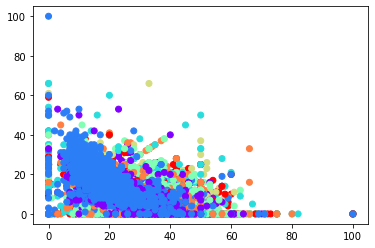

In [ ]:
plt.figure()
plt.scatter(table_suite.iloc[:,2], table_suite.iloc[:,3],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"], cmap ='rainbow')

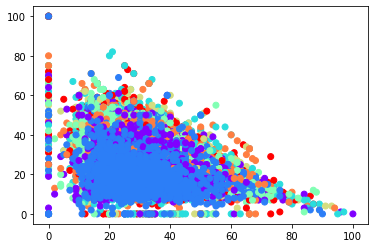

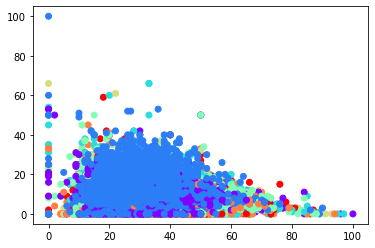

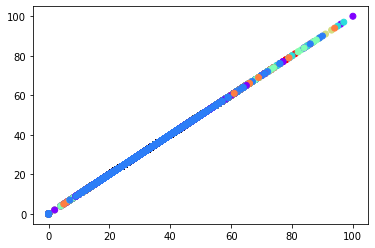

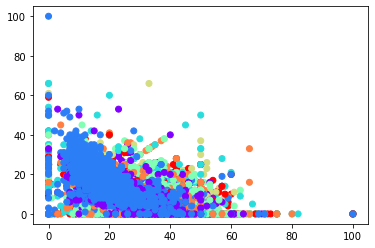

In [ ]:
plt.figure()
plt.scatter(table_suite.iloc[:,1], table_suite.iloc[:,2],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"], cmap ='rainbow')

plt.figure()
plt.scatter(table_suite.iloc[:,1], table_suite.iloc[:,3],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"], cmap ='rainbow')

plt.figure()
plt.scatter(table_suite.iloc[:,1], table_suite.iloc[:,4],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"], cmap ='rainbow')

plt.figure()
plt.scatter(table_suite.iloc[:,2], table_suite.iloc[:,3],
            c = com_ident_huit_carac_class_kmeans_cah_kmeans_final_spad["class_kmeans_final"], cmap ='rainbow')